# Vince

Peace_Treaty_Accords	Technological_Advancements	Ammonia_Concentration	Precious_Metal_Trade_Tons	Food_Production_Tons	Trade_Agreements_Signed	Last_Contact_Days	Discovery_Date	Mineral_Extraction_Tons	Galactic_Visits

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas as pd
import numpy as np
from scipy.stats import bernoulli

In [24]:
title = 'alien_galaxy.csv'
df = pd.read_csv(title)
df.head()

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Galactic_Trade_Revenue,Alien_Civilization_Level,Interstellar_Contact_Cost,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,78285.0,10.0,Married,98.55,3118.0,NaN,11.0,Master,3.0,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,62772.0,10.0,Single,66.36,3099.0,0.0,11.0,Master,3.0,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,69016.0,5.0,Married,25.23,3100.0,0.0,11.0,Graduation,3.0,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,43795.0,NaN,Together,44.59,3098.0,1.0,11.0,Master,3.0,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,57957.0,8.0,Together,90.67,3089.0,0.0,11.0,Graduation,3.0,4.0


In [25]:
#Make a copy of the dataframe, as such we can always go back easily
df_in_progress = df.drop(['Planet_ID', 'Galactic_Trade_Revenue', 'Interstellar_Contact_Cost'], axis=1)
df_in_progress

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,0.0,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,Master,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,0.0,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,Master,5.0
2,NaN,0.0,1.0,161.0,53.0,NaN,61.0,22-03-2029,363.0,5.0,...,0.0,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,Graduation,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,0.0,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,Master,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,0.0,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,Graduation,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,NaN,NaN,14.0,5.0,...,0.0,8.0,35924.0,2.0,Together,71.60,3099.0,0.0,Master,1.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,27-11-2029,NaN,5.0,...,0.0,56.0,47472.0,9.0,Together,NaN,3096.0,0.0,PhD,2.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,28-09-2029,61.0,4.0,...,NaN,140.0,62499.0,5.0,Together,62.52,3109.0,0.0,NaN,3.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,01-10-2029,197.0,4.0,...,0.0,202.0,49767.0,2.0,Single,47.32,3121.0,0.0,Graduation,5.0


In [26]:
# Function to quickly plot the demanded variables

def perform_graphical_analysis(plots_per_row, columns):

    for i in range(0, len(columns), plots_per_row):
        remaining_columns = len(columns) - i
        
        if remaining_columns == 2:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        elif remaining_columns == 1:
            fig, ax = plt.subplots(1, 1, figsize=(6, 6))
        else:
            fig, axes = plt.subplots(1, plots_per_row, figsize=(18, 6))
        
        for j, column in enumerate(columns[i:i+plots_per_row]):
            if remaining_columns == 1:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_in_progress[column], ax=ax)
                    ax.set_title(f'Count plot of {column} (binary)')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Count')
                else:
                    sns.histplot(df_in_progress[column], kde=True, ax=ax)
                    ax.set_title(f'Distribution of {column}')
                    ax.set_xlabel(column)
                    ax.set_ylabel('Frequency')
            else:
                if df[column].nunique() <= 2:
                    sns.countplot(x=df_in_progress[column], ax=axes[j])
                    axes[j].set_title(f'Count plot of {column} (binary)')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Count')
                else:
                    sns.histplot(df_in_progress[column], kde=True, ax=axes[j])
                    axes[j].set_title(f'Distribution of {column}')
                    axes[j].set_xlabel(column)
                    axes[j].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

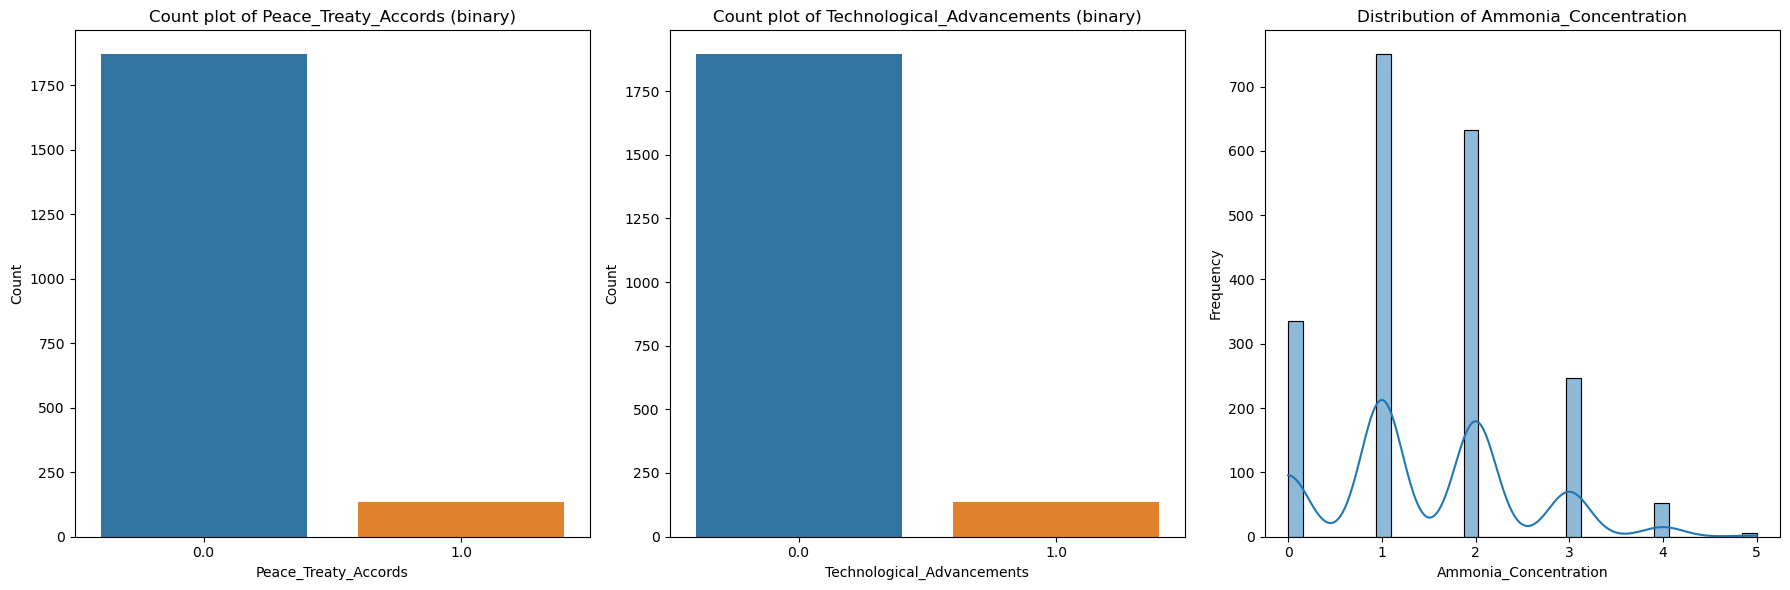

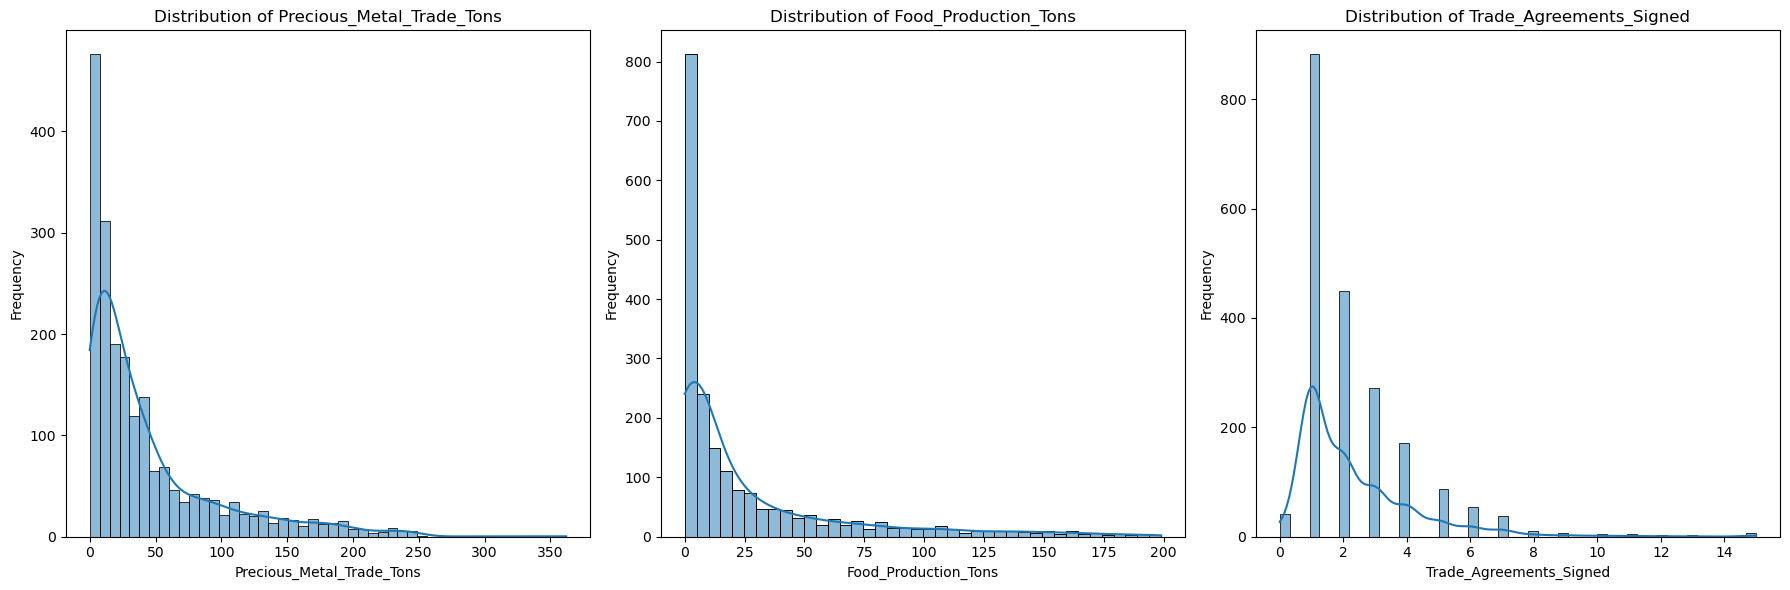

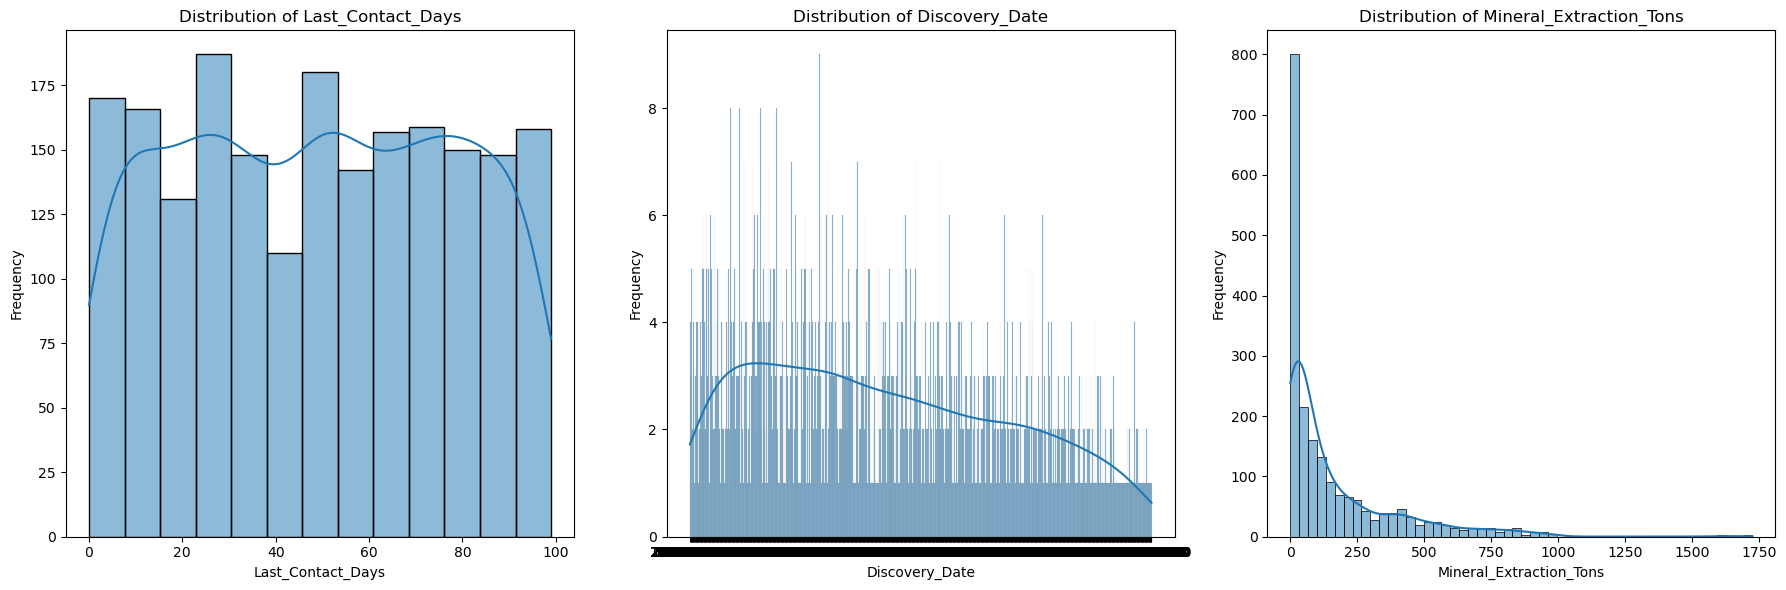

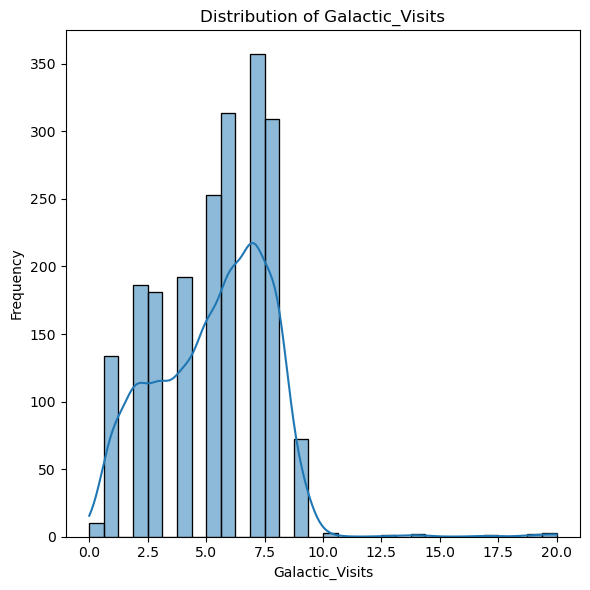

In [27]:
plots_per_row = 3
columns = ['Peace_Treaty_Accords', 'Technological_Advancements',
       'Ammonia_Concentration', 'Precious_Metal_Trade_Tons',
       'Food_Production_Tons', 'Trade_Agreements_Signed', 'Last_Contact_Days',
       'Discovery_Date', 'Mineral_Extraction_Tons', 'Galactic_Visits',
       ]
perform_graphical_analysis(plots_per_row, columns)

In [28]:
#Since the 2 distribution graphs of these variables ('Peace_Treaty_Accords', 'Technological_Advancements') looked similar i quickly performed a 
#correlation test, but correlation is rather low.
correlation = df['Peace_Treaty_Accords'].corr(df['Technological_Advancements'])
print("Correlation:", correlation)

#WE SHOULD ALSO PERFORM THIS CORRELATION TEST FOR OTHER VARIABLES!!!! (TO DO)

Correlation: 0.11523715422253672


In [29]:
#Example code to complete a bernoulli distributed variable
data = pd.DataFrame({
    'binary_feature': [1, 0, 1, np.nan, 0, 1, np.nan, 0, np.nan, 1]
})
# Step 1: Calculate the probability of success (P(X=1))
# Ignore NaNs when calculating the mean (probability of 1's in the observed data)
p_success = data['binary_feature'].mean()

# Step 2: Generate samples using the Bernoulli distribution
# Create samples only for the NaN values
nan_indices = data['binary_feature'].isna()

samples = bernoulli(p_success).rvs(size=nan_indices.sum())

# Step 3: Replace NaN values with the generated samples
data.loc[nan_indices, 'binary_feature'] = samples

print("Completed dataset:")
print(data)

Completed dataset:
   binary_feature
0             1.0
1             0.0
2             1.0
3             0.0
4             0.0
5             1.0
6             0.0
7             0.0
8             1.0
9             1.0


In [30]:
# Code in next cell is more efficient using a function and can be easily extended to new binary variables
"""#Complete the Bernoulli distributed variables

data_peace_treaty = df_in_progress['Peace_Treaty_Accords'].copy() #this way you avoid a warning from pandas
data_technological_advancements = df_in_progress['Technological_Advancements'].copy()
# Step 1: Calculate the probability of success (P(X=1))
# Ignore NaNs when calculating the mean (probability of 1's in the observed data)
p_success_peace_treaty = data_peace_treaty.mean()
p_success_technological_advancements = data_technological_advancements.mean()

# Step 2: Generate samples using the Bernoulli distribution
# Create samples only for the NaN values
nan_indices_peace_treaty = data_peace_treaty.isna()
nan_technological_advancements = data_technological_advancements.isna()

samples_peace_treaty = bernoulli(p_success_peace_treaty).rvs(size=nan_indices_peace_treaty.sum())
samples_technological_advancements = bernoulli(p_success_technological_advancements).rvs(size=nan_technological_advancements.sum())

# Step 3: Replace NaN values with the generated samples
data_peace_treaty.loc[nan_indices_peace_treaty] = samples_peace_treaty
data_technological_advancements.loc[nan_technological_advancements] = samples_technological_advancements

#print(f"Completed dataset data_peace_treaty:\n{data_peace_treaty}")
#print(f"Completed dataset data_technological_advancements:\n{data_technological_advancements}")

df_in_progress['Peace_Treaty_Accords'] = data_peace_treaty
df_in_progress['Technological_Advancements'] = data_technological_advancements
#df_in_progress.head()

print(df_in_progress.isna().sum()[:10])"""

'#Complete the Bernoulli distributed variables\n\ndata_peace_treaty = df_in_progress[\'Peace_Treaty_Accords\'].copy() #this way you avoid a warning from pandas\ndata_technological_advancements = df_in_progress[\'Technological_Advancements\'].copy()\n# Step 1: Calculate the probability of success (P(X=1))\n# Ignore NaNs when calculating the mean (probability of 1\'s in the observed data)\np_success_peace_treaty = data_peace_treaty.mean()\np_success_technological_advancements = data_technological_advancements.mean()\n\n# Step 2: Generate samples using the Bernoulli distribution\n# Create samples only for the NaN values\nnan_indices_peace_treaty = data_peace_treaty.isna()\nnan_technological_advancements = data_technological_advancements.isna()\n\nsamples_peace_treaty = bernoulli(p_success_peace_treaty).rvs(size=nan_indices_peace_treaty.sum())\nsamples_technological_advancements = bernoulli(p_success_technological_advancements).rvs(size=nan_technological_advancements.sum())\n\n# Step 3: Re

In [31]:
def complete_bernoulli_variable(column_name):
    data_column = df_in_progress[column_name].copy()
    p_success = data_column.mean()
    
    nan_indices = data_column.isna()
    samples = bernoulli(p_success).rvs(size=nan_indices.sum())
    
    data_column.loc[nan_indices] = samples
    
    df_in_progress[column_name] = data_column

# Apply the function to each column
complete_bernoulli_variable('Peace_Treaty_Accords')
complete_bernoulli_variable('Technological_Advancements')

print(df_in_progress.isna().sum()[:10])

Peace_Treaty_Accords            0
Technological_Advancements      0
Ammonia_Concentration         217
Precious_Metal_Trade_Tons     215
Food_Production_Tons          246
Trade_Agreements_Signed       207
Last_Contact_Days             234
Discovery_Date                226
Mineral_Extraction_Tons       208
Galactic_Visits               220
dtype: int64


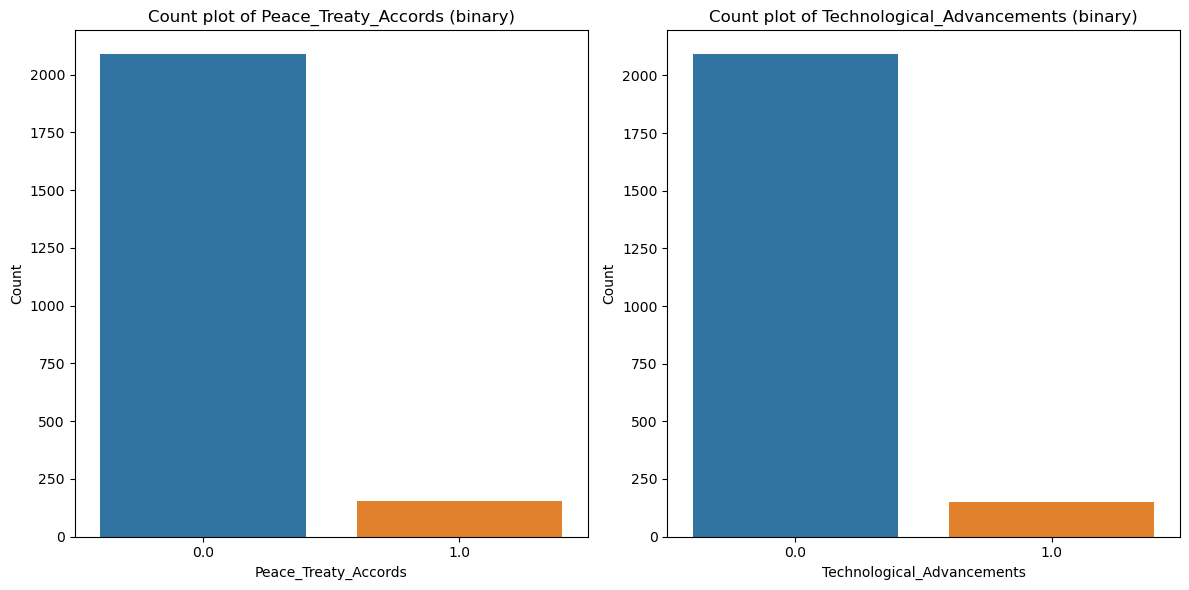

In [32]:
# plotting the updated variables
plots_per_row = 3
columns = ['Peace_Treaty_Accords', 'Technological_Advancements']
perform_graphical_analysis(plots_per_row, columns)

In [33]:
# Multinomial distribution

def complete_column_with_distribution(column_name):
    # Extract non-NaN values
    column_data = df_in_progress[column_name]
    non_nan_data = column_data.dropna()
    
    # Calculate the probability distribution of observed values
    value_counts = non_nan_data.value_counts(normalize=True).sort_index()
    possible_values = np.arange(int(non_nan_data.min()), int(non_nan_data.max()) + 1)
    probs = [value_counts.get(value, 0) for value in possible_values]
    
    # Generate samples for NaN indices
    nan_indices = column_data[column_data.isna()].index
    sampled_values = np.random.choice(possible_values, size=len(nan_indices), p=probs)
    
    # Replace NaNs with sampled values
    df_in_progress.loc[nan_indices, column_name] = sampled_values

# Apply the function to the Ammonia_Concentration column
complete_column_with_distribution('Ammonia_Concentration')
complete_column_with_distribution('Trade_Agreements_Signed')
complete_column_with_distribution('Galactic_Visits')

# Check for remaining NaNs in the first 10 columns
print("DataFrame with NaNs filled in specified columns:")
print(df_in_progress.isna().sum()[:10])

DataFrame with NaNs filled in specified columns:
Peace_Treaty_Accords            0
Technological_Advancements      0
Ammonia_Concentration           0
Precious_Metal_Trade_Tons     215
Food_Production_Tons          246
Trade_Agreements_Signed         0
Last_Contact_Days             234
Discovery_Date                226
Mineral_Extraction_Tons       208
Galactic_Visits                 0
dtype: int64


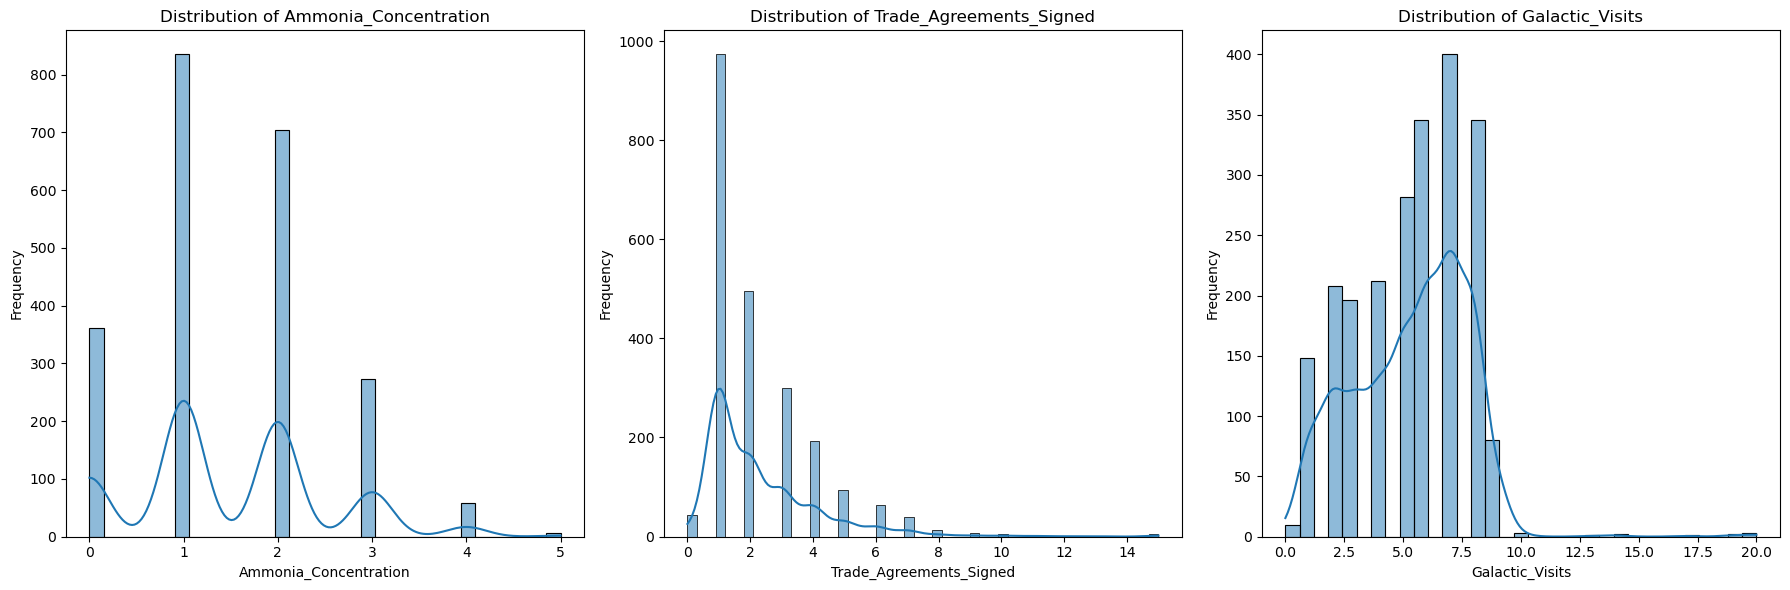

In [34]:
# plotting the updated variables
plots_per_row = 3
columns = ['Ammonia_Concentration', 'Trade_Agreements_Signed', 'Galactic_Visits']
perform_graphical_analysis(plots_per_row, columns)

In [37]:
df_in_progress

,Peace_Treaty_Accords,Technological_Advancements,Ammonia_Concentration,Precious_Metal_Trade_Tons,Food_Production_Tons,Trade_Agreements_Signed,Last_Contact_Days,Discovery_Date,Mineral_Extraction_Tons,Galactic_Visits,...,Terraforming_Initiatives,Liquid_Energy_Consumption_Terawatts,Alien_Population_Count,CO2_Concentration,Dominant_Species_Social_Structure,Hydrogen_Concentration,Colonization_Year,Species_Expansion_Response,Alien_Civilization_Level,Interplanetary_Communications
0,0.0,0.0,1.0,40.0,107.0,1.0,13.0,26-02-2030,391.0,3.0,...,0.0,647.0,78285.0,10.0,Married,98.55,3118.0,NaN,Master,6.0
1,0.0,0.0,2.0,108.0,49.0,1.0,NaN,29-11-2028,NaN,2.0,...,0.0,581.0,62772.0,10.0,Single,66.36,3099.0,0.0,Master,5.0
2,0.0,0.0,1.0,161.0,53.0,2.0,61.0,22-03-2029,363.0,5.0,...,0.0,726.0,69016.0,5.0,Married,25.23,3100.0,0.0,Graduation,8.0
3,0.0,0.0,1.0,107.0,NaN,3.0,NaN,15-01-2030,53.0,7.0,...,0.0,314.0,43795.0,NaN,Together,44.59,3098.0,1.0,Master,7.0
4,0.0,0.0,0.0,29.0,59.0,7.0,24.0,06-08-2029,177.0,3.0,...,0.0,290.0,57957.0,8.0,Together,90.67,3089.0,0.0,Graduation,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.0,0.0,2.0,7.0,0.0,1.0,NaN,NaN,14.0,5.0,...,0.0,8.0,35924.0,2.0,Together,71.60,3099.0,0.0,Master,1.0
2236,0.0,0.0,2.0,8.0,0.0,2.0,39.0,27-11-2029,NaN,5.0,...,0.0,56.0,47472.0,9.0,Together,NaN,3096.0,0.0,PhD,2.0
2237,0.0,0.0,1.0,4.0,4.0,2.0,0.0,28-09-2029,61.0,4.0,...,NaN,140.0,62499.0,5.0,Together,62.52,3109.0,0.0,NaN,3.0
2238,0.0,0.0,1.0,149.0,47.0,1.0,92.0,01-10-2029,197.0,4.0,...,0.0,202.0,49767.0,2.0,Single,47.32,3121.0,0.0,Graduation,5.0


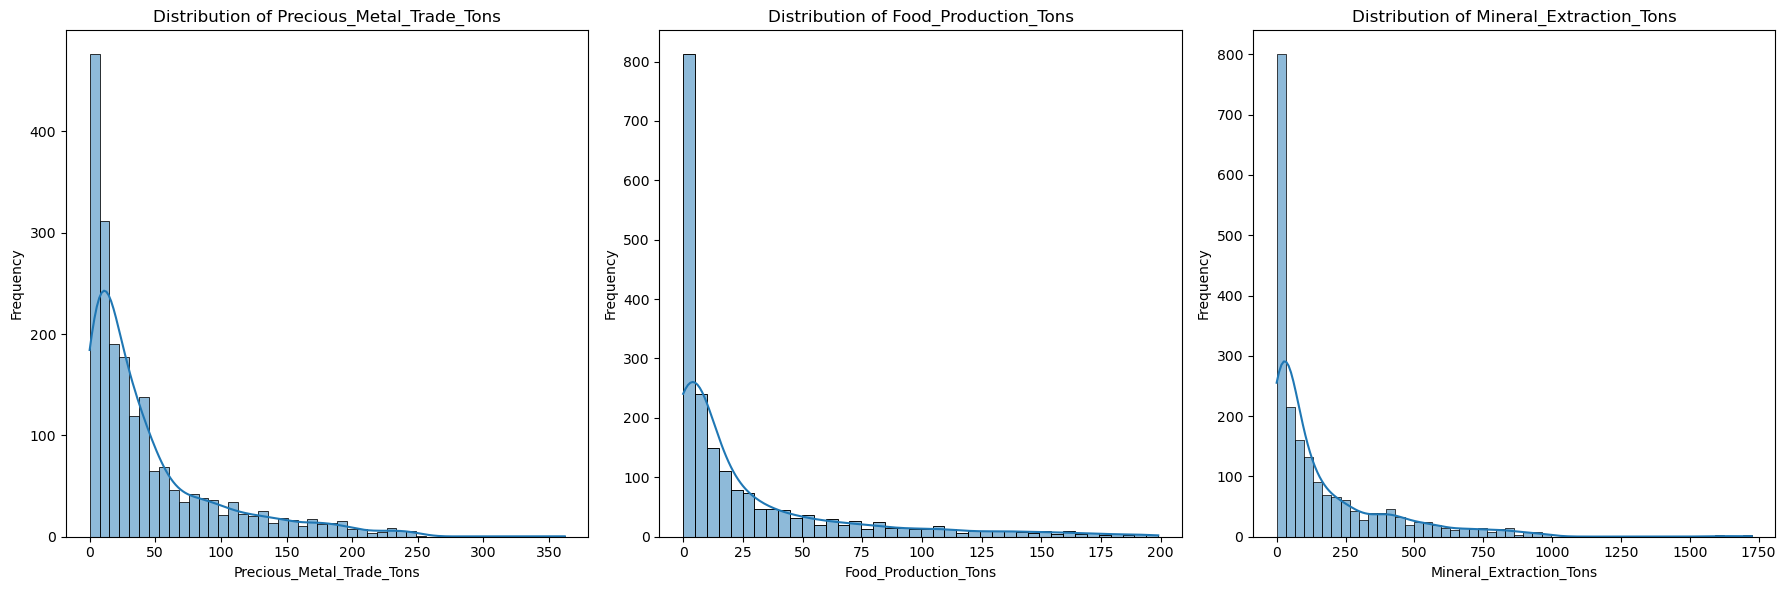

In [40]:
#IN PROGRESS
plots_per_row = 3
columns = ['Precious_Metal_Trade_Tons','Food_Production_Tons', 'Mineral_Extraction_Tons']
perform_graphical_analysis(plots_per_row, columns)